Score Predictiion Using How many hours spend

In [27]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib.pyplot as plot

In [28]:
#Loading data through url,Reading data
url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
Data =pd.read_csv(url)

In [29]:
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [30]:
#Checking null values
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


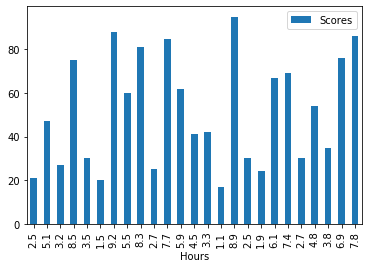

In [32]:
#Plotting the data
Data.plot(x="Hours",y="Scores",kind='bar')
plot.Xlabel="Hours"
plot.Ylabel="Scores"
plot.show()



In [33]:
#Partitioning Data as Target and Label

In [34]:
Target=Data.iloc[:,1].values

In [35]:
Target

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [36]:
label=Data.iloc[:,:1].values

In [37]:
label

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Splitting the Data sets as 80% as training and 20% for testing

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(label,Target,train_size=.8,random_state=0)

In [40]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [41]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [42]:
Y_test


array([20, 27, 69, 30, 62], dtype=int64)

In [43]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [44]:
#Fitting Data set into the model
from sklearn.linear_model import LinearRegression


In [45]:
Regressor = LinearRegression()

In [46]:
Regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#Predicting using the train set
Y_pred= Regressor.predict(X_test)

In [48]:
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [49]:
#Showing the Actual; Data and the predicted Data
df=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


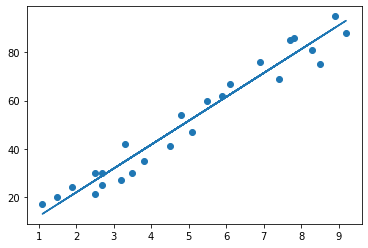

In [50]:
# Plotting the diagram Using the line equation mx+c
plot.scatter(label,Target)
line=Regressor.coef_*label+Regressor.intercept_
plot.plot(label,line)

In [51]:
hours=[[9.25]]
s=np.array(hours)
s.reshape(-1,1)
q=Regressor.predict(hours)
print("The marks will obtain if you are studying in{} hours you will get {} marks".format(hours,q))

The marks will obtain if you are studying in[[9.25]] hours you will get [93.69173249] marks


In [52]:
from sklearn import metrics
print("mean Absolute erro:",metrics.mean_absolute_error(Y_test,Y_pred))
print("mean squared error",metrics.mean_squared_error(Y_test,Y_pred))
print("Root mean:",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

mean Absolute erro: 4.183859899002975
mean squared error 21.5987693072174
Root mean: 4.6474476121003665
